In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext autotime

time: 314 µs


In [3]:
%cd ..

/Users/rubenbroekx/Documents/Projects/twitter-sentiment-classifier/twitter_sentiment_classifier
time: 2.72 ms


# Timestamp Optimisation

This notebook calculates the times it is best to fetch the tweets (on a daily basis).

Every day, 16 queries can be performed.

Source on twitter distribution: https://buffer.com/resources/best-time-to-tweet-research/

![Europe Tweet Frequency by Day](https://buffer.com/resources/content/images/resources/wp-content/uploads/2015/06/Most-Popular-Time-to-Tweet-Europe-659x800.png)

## 1. Target

Try to mimic the target-distribution shown in the image above.

In [9]:
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt import fmin, tpe, space_eval
from math import floor
from collections import Counter

time: 688 µs


In [5]:
# Esimation target, based on the image above
TARGET = {
    '0-1': 20,
    '1-2': 15,
    '2-3': 12,
    '3-4': 10,
    '4-5': 8,
    '5-6': 10,
    '6-7': 21,
    '7-8': 45,
    '8-9': 72,
    '9-10': 85,
    '10-11': 90,
    '11-12': 88,
    '12-13': 79,
    '13-14': 76,
    '14-15': 75,
    '15-16': 85,
    '16-17': 87,
    '17-18': 86,
    '18-19': 76,
    '19-20': 65,
    '20-21': 62,
    '21-22': 53,
    '22-23': 45,
    '23-24': 30,
}

time: 650 µs


In [6]:
# Normalise the target
TARGET_NORM = {k:v/sum(TARGET.values()) for k,v in TARGET.items()}

time: 594 µs


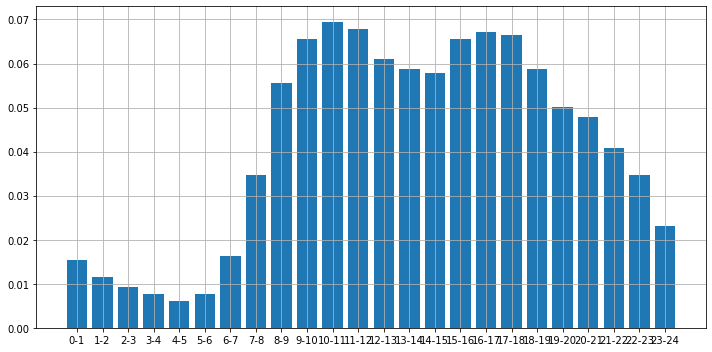

time: 258 ms


In [8]:
# Visualise to compare with image above
plt.figure(figsize=(10,5))
plt.bar(TARGET.keys(), TARGET_NORM.values())
plt.tight_layout()
plt.grid()
plt.show()

## 2. Estimation

Create an estimation/approximation of the target distribution shown above. This is done via hyperparameter optimisation.

In [10]:
def objective(args):
    points = [0,] + sorted(args) + [24,]
    
    # Calculate the distribution
    counter = Counter()
    for i in range(16):
        a,b = points[i:i+2]
        for n in range(500):
            counter[floor(a+(b-a)*(n/500))] += 1
    counter_norm = {list(TARGET_NORM.keys())[k]:v/sum(counter.values()) for k,v in counter.items()}
    
    # Minimise the error between TARGET_NORM and counter_norm via MSE
    return sum([(v - counter_norm[k])**2 for k,v in TARGET_NORM.items()]) / len(TARGET_NORM)

# Previously calculated distribution, has a loss of 5.314810445270147e-06
PREDEFINED = [
 6.744403114784788,
 8.556299829615943,
 9.314036726080687,
 10.388159681583515,
 11.204499771393554,
 12.159433892618932,
 13.194785925734962,
 14.273679589561931,
 15.344018631622887,
 16.24590365581264,
 17.18670333893522,
 18.12169808161924,
 19.208416795547137,
 20.469007814831993,
 21.878788614160104,
]

space = []
for i in range(15):
    space.append(hp.normal(str(i),PREDEFINED[i], .01))
best = fmin(objective, space, algo=tpe.suggest, max_evals=500)
best_points = [0,] + sorted(best.values()) + [24,]
best_points

100%|██████████| 500/500 [00:11<00:00, 42.54trial/s, best loss: 5.336749795334497e-06] 


[0,
 6.746085531524582,
 8.5471794136073,
 9.32595784135408,
 10.402477601549375,
 11.209649567901057,
 12.162362791339707,
 13.208955114876849,
 14.281270520748093,
 15.361142921517494,
 16.250351288467368,
 17.192042448836023,
 18.128706675176446,
 19.205638601834067,
 20.459704493694097,
 21.8786187026953,
 24]

time: 11.8 s


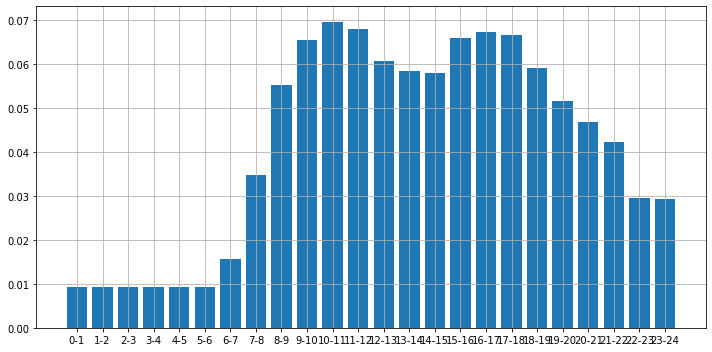

time: 263 ms


In [12]:
# Visualise the result
counter = Counter()
for i in range(16):
    a,b = best_points[i:i+2]
    for n in range(500):
        counter[floor(a+(b-a)*(n/500))] += 1
counter_norm = {list(TARGET_NORM.keys())[k]:v/sum(counter.values()) for k,v in counter.items()}

plt.figure(figsize=(10,5))
plt.bar(counter_norm.keys(), counter_norm.values())
plt.tight_layout()
plt.grid()
plt.show()